# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0-lambda'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **19th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Holy See'],
 3: ['Saint Kitts and Nevis', 'Timor-Leste', 'Laos'],
 4: ['Tanzania', 'Grenada', 'Dominica', 'Fiji'],
 6: ['Equatorial Guinea'],
 7: ['Brunei', 'Northern Mariana Islands', 'Saint Vincent and the Grenadines'],
 8: ['Mauritius', 'Liechtenstein', 'Bahamas', 'Kyrgyzstan', 'Cambodia',
     'Seychelles', 'Saint Lucia'],
 9: ['Republic of the Congo', 'Madagascar', 'Botswana', 'Guam', 'Australia',
     'Uzbekistan', 'Papua New Guinea', 'Antigua and Barbuda', 'Ethiopia',
     'Guyana', 'Trinidad and Tobago'],
 10: ['Oman', 'Kazakhstan', 'Djibouti', 'India', 'Nicaragua', 'Barbados',
      'Iraq', 'Maldives', 'Jamaica', 'Bhutan', 'Guatemala', 'Venezuela',
      'Sao Tome and Principe', 'Kenya', 'Angola', 'Monaco', 'Vietnam',
      'Algeria', 'Singapore', 'Philippines', 'Iceland', 'Zimbabwe',
      'Virgin Islands, U.S.', 'Libya', 'Gambia', 'Belize'],
 11: ['Ecuador', 'Rwanda', 'Burundi', 'Cape Verde', 'Suriname', 'Kuwait',
      'South Africa', 'Argentina', 'Lesotho', 'Chile', 

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=19)
# The number of countries
len(analyser.countries)

2

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{19: ['Norway', 'Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Norway  0th    Past  08Mar2020  21Mar2020     5311916
        1st    Past  22Mar2020  05Apr2020     5311916
        2nd    Past  06Apr2020  01May2020     5311916
        3rd    Past  02May2020  05Aug2020     5311916
        4th    Past  06Aug2020  02Sep2020     5311916
        5th    Past  03Sep2020  20Sep2020     5311916
        6th    Past  21Sep2020  07Oct2020     5311916
        7th    Past  08Oct2020  24Oct2020     5311916
        8th    Past  25Oct2020  01Nov2020     5311916
        9th    Past  02Nov2020  08Nov2020     5311916
        10th   Past  09Nov2020  14Nov2020     5311916
        11th   Past  15Nov2020  22Nov2020     5311916
        12th   Past  23Nov2020  29Nov2020     5311916
        13th   Past  30Nov2020  07Dec2020     5311916
        14th   Past  08Dec2020  14Dec2020     5311916
        15th   Past  15Dec2020  21Dec2020     5311916
        16th   Past  22Dec2020  28Dec2020     5311916
        17th   Past  29Dec2020  05Jan2021     5311916
        18th   Past  06Jan2021  14Jan2021     5311916
Germany 0th    Past  19Jan2020  23Mar2020    82905782
        1st    Past  24Mar2020  06Apr2020    82905782
        2nd    Past  07Apr2020  05May2020    82905782
        3rd    Past  06May2020  04Aug2020    82905782
        4th    Past  05Aug2020  12Sep2020    82905782
        5th    Past  13Sep2020  07Oct2020    82905782
        6th    Past  08Oct2020  20Oct2020    82905782
        7th    Past  21Oct2020  27Oct2020    82905782
        8th    Past  28Oct2020  03Nov2020    82905782
        9th    Past  04Nov2020  10Nov2020    82905782
        10th   Past  11Nov2020  17Nov2020    82905782
        11th   Past  18Nov2020  24Nov2020    82905782
        12th   Past  25Nov2020  01Dec2020    82905782
        13th   Past  02Dec2020  08Dec2020    82905782
        14th   Past  09Dec2020  15Dec2020    82905782
        15th   Past  16Dec2020  21Dec2020    82905782
        16th   Past  22Dec2020  28Dec2020    82905782
        17th   Past  29Dec2020  05Jan2021    82905782
        18th   Past  06Jan2021  14Jan2021    82905782

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	NOR,  8th phase (25Oct2020 - 01Nov2020): finished  180 trials in 0 min 10 sec

	DEU,  3rd phase (06May2020 - 04Aug2020): finished  149 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 01May2020): finished  170 trials in 0 min 10 sec

	DEU,  6th phase (08Oct2020 - 20Oct2020): finished  168 trials in 0 min 10 sec

	NOR,  9th phase (02Nov2020 - 08Nov2020): finished  138 trials in 0 min 10 sec

	NOR,  1st phase (22Mar2020 - 05Apr2020): finished  136 trials in 0 min 10 sec

	NOR,  0th phase (08Mar2020 - 21Mar2020): finished  121 trials in 0 min 10 sec

	DEU, 15th phase (16Dec2020 - 21Dec2020): finished  129 trials in 0 min 10 sec

	DEU,  0th phase (19Jan2020 - 23Mar2020): finished  157 trials in 0 min 10 sec

	DEU, 13th phase (02Dec2020 - 08Dec2020): finished  172 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 20Sep2020): finished  174 trials in 0 min 10 sec

	NOR, 11th phase (15Nov2020 - 22Nov2020): finished  181 trials in 0 min 10 sec

	NOR, 14th phase (08Dec2020 - 14Dec2020): finished  175 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 29Nov2020): finished  177 trials in 0 min 10 sec

	NOR, 10th phase (09Nov2020 - 14Nov2020): finished  179 trials in 0 min 10 sec

	DEU,  8th phase (28Oct2020 - 03Nov2020): finished  177 trials in 0 min 10 sec

	DEU, 11th phase (18Nov2020 - 24Nov2020): finished  173 trials in 0 min 10 sec

	DEU, 10th phase (11Nov2020 - 17Nov2020): finished  180 trials in 0 min 10 sec

	NOR,  6th phase (21Sep2020 - 07Oct2020): finished  165 trials in 0 min 10 sec

	NOR, 16th phase (22Dec2020 - 28Dec2020): finished  185 trials in 0 min 10 sec

	DEU,  5th phase (13Sep2020 - 07Oct2020): finished  177 trials in 0 min 10 sec

	NOR, 17th phase (29Dec2020 - 05Jan2021): finished  177 trials in 0 min 10 sec

	NOR, 15th phase (15Dec2020 - 21Dec2020): finished  186 trials in 0 min 10 sec

	DEU, 14th phase (09Dec2020 - 15Dec2020): finished  174 trials in 0 min 10 sec

	DEU,  4th phase (05Aug2020 - 12Sep2020): finished  160 trials in 0 min 10 sec

	NOR,  7th phase (08Oct2020 - 24Oct2020): finished  160 trials in 0 min 10 sec

	DEU,  1st phase (24Mar2020 - 06Apr2020): finished  164 trials in 0 min 10 sec

	NOR, 18th phase (06Jan2021 - 14Jan2021): finished  165 trials in 0 min 10 sec

	DEU,  2nd phase (07Apr2020 - 05May2020): finished  169 trials in 0 min 10 sec

	DEU, 12th phase (25Nov2020 - 01Dec2020): finished  176 trials in 0 min 10 sec

	NOR, 13th phase (30Nov2020 - 07Dec2020): finished  180 trials in 0 min 10 sec

	DEU,  7th phase (21Oct2020 - 27Oct2020): finished  180 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  203 trials in 0 min 10 sec

	NOR,  3rd phase (02May2020 - 05Aug2020): finished  186 trials in 0 min 10 sec

	DEU,  9th phase (04Nov2020 - 10Nov2020): finished  220 trials in 0 min 10 sec

Completed optimization. Total: 1 min 43 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt     theta  \
Country Phase                                                                   
Norway  0th    Past  08Mar2020  21Mar2020     5311916  SIR-F  84.51  0.004749   
        1st    Past  22Mar2020  05Apr2020     5311916  SIR-F  40.34  0.032577   
        2nd    Past  06Apr2020  01May2020     5311916  SIR-F   0.30  0.093195   
        3rd    Past  02May2020  05Aug2020     5311916  SIR-F   0.36  0.024429   
        4th    Past  06Aug2020  02Sep2020     5311916  SIR-F   2.03  0.003232   
        5th    Past  03Sep2020  20Sep2020     5311916  SIR-F   1.61  0.003232   
        6th    Past  21Sep2020  07Oct2020     5311916  SIR-F   2.25  0.000795   
        7th    Past  08Oct2020  24Oct2020     5311916  SIR-F   0.94  0.000728   
        8th    Past  25Oct2020  01Nov2020     5311916  SIR-F   2.86  0.001151   
        9th    Past  02Nov2020  08Nov2020     5311916  SIR-F   4.10  0.024033   
        10th   Past  09Nov2020  14Nov2020     5311916  SIR-F   4.19  0.001441   
        11th   Past  15Nov2020  22Nov2020     5311916  SIR-F   5.86  0.003924   
        12th   Past  23Nov2020  29Nov2020     5311916  SIR-F   4.04  0.020118   
        13th   Past  30Nov2020  07Dec2020     5311916  SIR-F   3.20  0.001674   
        14th   Past  08Dec2020  14Dec2020     5311916  SIR-F   2.05  0.119944   
        15th   Past  15Dec2020  21Dec2020     5311916  SIR-F   2.95  0.087290   
        16th   Past  22Dec2020  28Dec2020     5311916  SIR-F   3.01  0.042072   
        17th   Past  29Dec2020  05Jan2021     5311916  SIR-F   3.26  0.018615   
        18th   Past  06Jan2021  14Jan2021     5311916  SIR-F   2.53  0.146732   
Germany 0th    Past  19Jan2020  23Mar2020    82905782  SIR-F   1.86  0.573467   
        1st    Past  24Mar2020  06Apr2020    82905782  SIR-F   4.25  0.034646   
        2nd    Past  07Apr2020  05May2020    82905782  SIR-F   0.45  0.056940   
        3rd    Past  06May2020  04Aug2020    82905782  SIR-F   0.75  0.002473   
        4th    Past  05Aug2020  12Sep2020    82905782  SIR-F   1.42  0.003232   
        5th    Past  13Sep2020  07Oct2020    82905782  SIR-F   1.45  0.000949   
        6th    Past  08Oct2020  20Oct2020    82905782  SIR-F   3.06  0.000676   
        7th    Past  21Oct2020  27Oct2020    82905782  SIR-F   3.03  0.002617   
        8th    Past  28Oct2020  03Nov2020    82905782  SIR-F   2.25  0.000121   
        9th    Past  04Nov2020  10Nov2020    82905782  SIR-F   1.44  0.000183   
        10th   Past  11Nov2020  17Nov2020    82905782  SIR-F   1.07  0.005338   
        11th   Past  18Nov2020  24Nov2020    82905782  SIR-F   0.97  0.005474   
        12th   Past  25Nov2020  01Dec2020    82905782  SIR-F   0.90  0.003952   
        13th   Past  02Dec2020  08Dec2020    82905782  SIR-F   0.99  0.002696   
        14th   Past  09Dec2020  15Dec2020    82905782  SIR-F   1.17  0.036001   
        15th   Past  16Dec2020  21Dec2020    82905782  SIR-F   1.03  0.104786   
        16th   Past  22Dec2020  28Dec2020    82905782      -      -         -   
        17th   Past  29Dec2020  05Jan2021    82905782      -      -         -   
        18th   Past  06Jan2021  14Jan2021    82905782      -      -         -   

                  kappa       rho     sigma    tau 1/gamma [day] alpha1 [-]  \
Country Phase                                                                 
Norway  0th    0.000400  0.034190  0.000003    360         86579      0.005   
        1st    0.000109  0.016944  0.000297    360           841      0.033   
        2nd    0.000150  0.003270  0.009716    360            25      0.093   
        3rd    0.000565  0.006017  0.015671    360            15      0.024   
        4th    0.000309  0.023025  0.010985    360            22      0.003   
        5th    0.000309  0.021797  0.013222    360            18      0.003   
        6th    0.000079  0.015317  0.006717    360            37      0.001   
        7th    0.000079  0.013373  0.014074    360            1

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-08,Norway,0.004749,0.0004,0.03419,0.000003,0.005,625,7,86579,...,0,0,0,0,0,0,2,1,0,11.11
1,2020-03-09,Norway,0.004749,0.0004,0.03419,0.000003,0.005,625,7,86579,...,0,0,0,0,0,0,2,1,0,11.11
2,2020-03-10,Norway,0.004749,0.0004,0.03419,0.000003,0.005,625,7,86579,...,0,0,0,0,0,0,2,1,0,14.81
3,2020-03-11,Norway,0.004749,0.0004,0.03419,0.000003,0.005,625,7,86579,...,0,2,0,0,0,0,2,1,0,20.37
4,2020-03-12,Norway,0.004749,0.0004,0.03419,0.000003,0.005,625,7,86579,...,0,2,1,0,0,0,2,1,0,40.74


### $Rt$: Reprodcution number $\mathrm{[-]}$

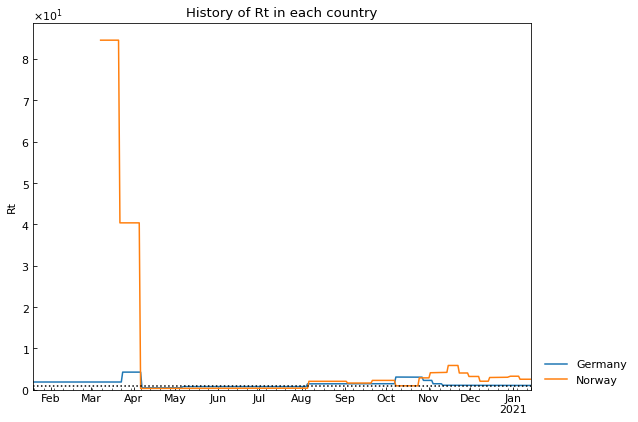

Country,Germany,Norway
Date,,
2021-01-10,1.03,2.53
2021-01-11,1.03,2.53
2021-01-12,1.03,2.53
2021-01-13,1.03,2.53
2021-01-14,1.03,2.53


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

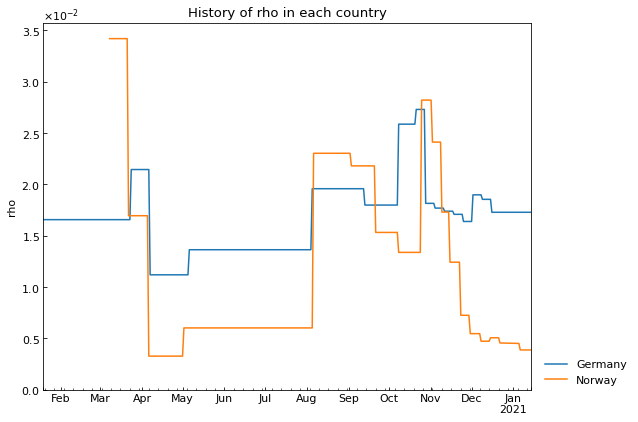

Country,Germany,Norway
Date,,
2021-01-10,0.017279,0.003872
2021-01-11,0.017279,0.003872
2021-01-12,0.017279,0.003872
2021-01-13,0.017279,0.003872
2021-01-14,0.017279,0.003872


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

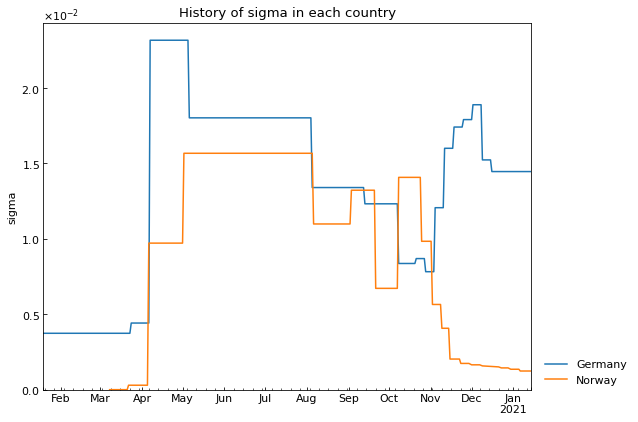

Country,Germany,Norway
Date,,
2021-01-10,0.014458,0.001239
2021-01-11,0.014458,0.001239
2021-01-12,0.014458,0.001239
2021-01-13,0.014458,0.001239
2021-01-14,0.014458,0.001239


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

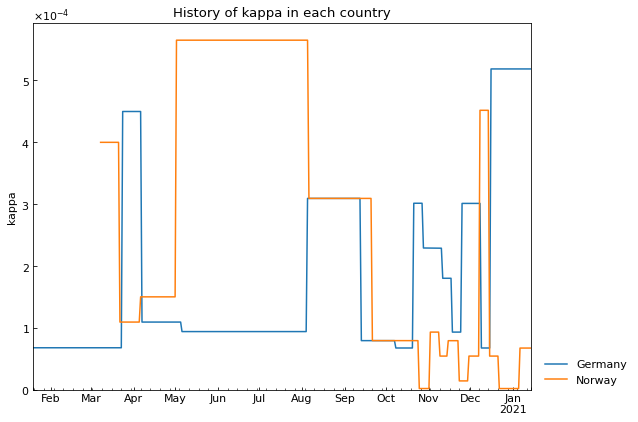

Country,Germany,Norway
Date,,
2021-01-10,0.000518,0.000067
2021-01-11,0.000518,0.000067
2021-01-12,0.000518,0.000067
2021-01-13,0.000518,0.000067
2021-01-14,0.000518,0.000067


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

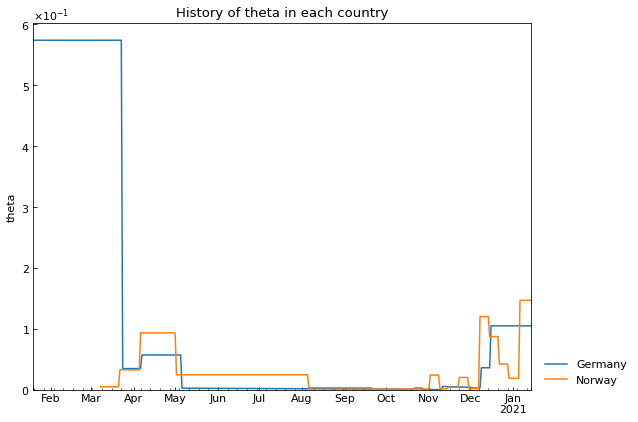

Country,Germany,Norway
Date,,
2021-01-10,0.104786,0.146732
2021-01-11,0.104786,0.146732
2021-01-12,0.104786,0.146732
2021-01-13,0.104786,0.146732
2021-01-14,0.104786,0.146732


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6439 entries, 0 to 6452
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 6439 non-null   datetime64[ns]
 1   Country                              6439 non-null   object        
 2   Rt                                   6439 non-null   float64       
 3   theta                                6439 non-null   float64       
 4   kappa                                6439 non-null   float64       
 5   rho                                  6439 non-null   float64       
 6   sigma                                6439 non-null   float64       
 7   School_closing                       6439 non-null   int64         
 8   Workplace_closing                    6439 non-null   int64         
 9   Cancel_events                        6439 non-null   int64         
 10  Gatherings_r

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,0.073742,0.031864,0.287201,-0.420817,-0.051155,-0.122178,-0.188666,-0.146993,0.003288,-0.141568,-0.098748,-0.106546,-0.056156,-0.184448,-0.127136,-0.118916
theta,0.073742,1.000000,-0.267445,-0.021163,-0.681635,-0.445399,-0.861871,-0.816196,-0.964886,-0.074422,-0.511974,-0.798006,-0.809433,-0.708794,-0.795402,-0.429310,-0.760181
kappa,0.031864,-0.267445,1.000000,0.221512,0.028492,0.407108,0.496204,0.244603,0.321849,0.555582,0.475766,0.293031,0.307881,0.248429,0.197539,0.240492,0.475600
rho,0.287201,-0.021163,0.221512,1.000000,-0.436267,-0.243446,0.050731,0.015254,0.011816,0.037397,0.103410,-0.078529,-0.090354,-0.004865,0.151247,0.265035,-0.075055
sigma,-0.420817,-0.681635,0.028492,-0.436267,1.000000,0.502370,0.665301,0.619318,0.697237,0.121036,0.428593,0.601408,0.652963,0.498659,0.554571,0.170982,0.645837
School_closing,-0.051155,-0.445399,0.407108,-0.243446,0.502370,1.000000,0.656247,0.561757,0.558397,0.340914,0.610180,0.590422,0.725697,0.473583,0.197320,-0.067777,0.809865
Workplace_closing,-0.122178,-0.861871,0.496204,0.050731,0.665301,0.656247,1.000000,0.853216,0.931025,0.409908,0.775561,0.777634,0.791588,0.664782,0.762891,0.408893,0.887395
Cancel_events,-0.188666,-0.816196,0.244603,0.015254,0.619318,0.561757,0.853216,1.000000,0.882595,0.161152,0.710813,0.770237,0.845643,0.767049,0.737430,0.432559,0.867551
Gatherings_restrictions,-0.146993,-0.964886,0.321849,0.011816,0.697237,0.558397,0.931025,0.882595,1.000000,0.168725,0.643285,0.819063,0.848402,0.718333,0.785380,0.418124,0.848796
Transport_closing,0.003288,-0.074422,0.555582,0.037397,0.121036,0.340914,0.409908,0.161152,0.168725,1.000000,0.467740,0.162471,0.111757,0.124562,0.191461,0.186473,0.387645


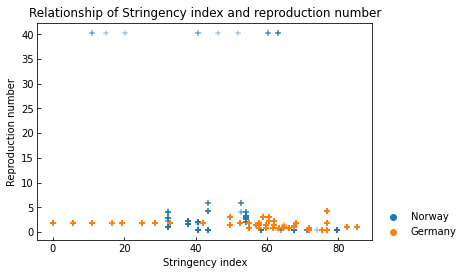

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()